# Loading Dataset

In [1]:
import pandas as pd
dataset = pd.read_csv('heart.csv')
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [2]:
print(dataset.shape)

(303, 14)


# Data Exploration

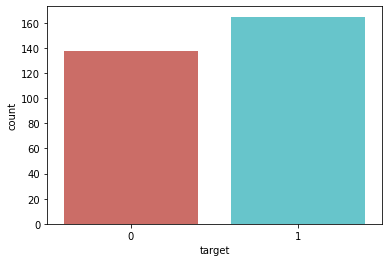

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x= 'target',data=dataset, palette = 'hls')
plt.show()

# Split the data into features (x) and target (y) label sets

In [4]:
x = pd.DataFrame(dataset.iloc[:,:-1])
y = pd.DataFrame(dataset.iloc[:,-1])

In [5]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [6]:
y

,target
0,1
1,1
2,1
3,1
4,1
...,...
298,0
299,0
300,0
301,0


# Split the data into a training and test set

In [7]:
# Import module to split dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.20, random_state=1)

# Create and Train the model

In [9]:
# Import model for fitting
from sklearn.linear_model import LogisticRegression

# Create instance (i.e.object) of LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)

C:\Users\VigneshKrishnan\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\VigneshKrishnan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Predicting the test set results

In [10]:
y_pred = logmodel.predict(x_test)

In [13]:
print(y_pred)

[0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0
 0 1 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1]


# Calculate the accuracy

In [14]:
print('Accuracy: %d', (logmodel.score(x_test,y_test)))

Accuracy: %d 0.7704918032786885


# Evaluate model using Confusion Matrix

In [18]:
from sklearn.metrics import confusion_matrix

In [20]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[20 10]
 [ 4 27]]


The result is telling us that we  have 20+27 correct predictions and 10+4 incorrect predictions.

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.67      0.74        30
           1       0.73      0.87      0.79        31

    accuracy                           0.77        61
   macro avg       0.78      0.77      0.77        61
weighted avg       0.78      0.77      0.77        61



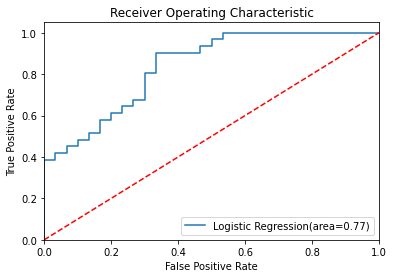

In [23]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logmodel.predict(x_test))
fpr,tpr, thersholds = roc_curve(y_test, logmodel.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr,tpr, label='Logistic Regression(area=%0.2f)'% logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Note: The receiver operating characteristic (ROC) curve is used with binary classifiers. The dotted line represents the ROC curve of a purely random classifier; a good classifier says as far away from that line as possitive(toward the top-left corner).

Judging from this we can say our classifier model was good enough with 77% Accuracy.